In [74]:
#Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer
import seaborn as sns


In [75]:
df = pd.read_csv('C:/Users/manjeet.singh/Downloads/churnModelBase_Assignment2 (3).csv')

In [72]:
print(list(df.columns))
df.info()
df.head()

['userID', 'Contact_ind', 'Customer_status', 'ActiveSinceDays', 'num_AcD_m0', 'num_AcD_m1', 'r_AcD_m0_m12', 'r_AcD_m0_m123', 'daystofirstload', 'dayssincelastload', 'tot_RevUo_m0', 'tot_RevUo_m1', 'tot_RevUo_m2', 'r_tot_RevUo_m0_m1', 'r_tot_RevUo_m1_m2', 'r_tot_RevUo_m0_m12', 'avg_RevUo_m0', 'avg_RevUo_m1', 'avg_RevUo_m2', 'chg_RevUo_l0_1m', 'chg_RevUo_l1_2m', 'chg_RevUo_l2_3m', 'tot_LdCnt_m0', 'tot_LdCnt_m1', 'tot_LdCnt_m2', 'max_RevUo_m0', 'max_RevUo_m1', 'max_RevUo_m2', 'r_avg_RevUo_m0_m1', 'r_avg_RevUo_m1_m2', 'avgdays_btw_loads_l6', 'tot_failed_LdTxnCnt_3m', 'r_failed_LdTxnCnt_m0_m12', 'tot_rtlX_m0', 'tot_rtlX_m1', 'tot_rtlX_m2', 'r_tot_rtlX_m0_m1', 'r_tot_rtlX_m1_m2', 'r_tot_rtlX_m0_m12', 'avg_rtlX_m0', 'avg_rtlX_m1', 'avg_rtlX_m2', 'max_rtlX_m0', 'max_rtlX_m1', 'max_rtlX_m2', 'r_avg_max_rtlX_m0', 'r_avg_max_rtlX_m1', 'r_avg_max_rtlX_m2', 'RtlTxns_cnt_m0', 'RtlTxns_cnt_m1', 'RtlTxns_cnt_m2', 'r_RtlTxns_cnt_m0_m1', 'r_RtlTxns_cnt_m1_m2', 'sum_r_RtlTxns_cnt', 'fail_RtlTxncnt_m0', '

,userID,Contact_ind,Customer_status,ActiveSinceDays,num_AcD_m0,num_AcD_m1,r_AcD_m0_m12,r_AcD_m0_m123,daystofirstload,dayssincelastload,...,InAllRev_m1,InAllRev_m2,r_InAllRev_m0_m1,r_InAllRev_m0_m2,tot_InAllRev_3m,OgAllRev_m0,OgAllRev_m1,OgAllRev_m2,tot_OgAllRev_3m,targetid
0,1,1,4,221,1,2,50.000000,33.333333,0,153,...,0.0,497.00,0.000000,0.000000,497.00,199.00,150.00,485.00,834.00,0
1,2,1,4,1225,3,1,150.000000,90.000000,0,14,...,245.0,345.00,270.325203,192.196532,1255.00,839.00,245.00,345.00,1429.00,0
2,3,1,3,838,18,19,120.000000,174.193548,724,47,...,15000.0,13782.57,23.331778,25.392551,32282.57,16730.64,15559.52,11196.57,43486.73,0
3,4,1,4,486,2,0,200.000000,200.000000,0,3,...,0.0,0.00,26400.000000,26400.000000,264.00,302.00,0.00,0.00,302.00,0
4,5,1,3,928,1,1,33.333333,37.500000,0,147,...,0.0,10.00,0.000000,0.000000,10.00,400.00,0.00,577.00,977.00,0


In [80]:
df[show_missing()].isnull().sum()


r_avg_max_rtlX_m0     10888
r_avg_max_rtlX_m1     12423
r_avg_max_rtlX_m2     12651
r_avg_max_rechX_m0     6878
r_avg_max_rechX_m1    11727
r_avg_max_rechX_m2    14083
dtype: int64

In [79]:
df


,userID,Contact_ind,Customer_status,ActiveSinceDays,num_AcD_m0,num_AcD_m1,r_AcD_m0_m12,r_AcD_m0_m123,daystofirstload,dayssincelastload,...,InAllRev_m1,InAllRev_m2,r_InAllRev_m0_m1,r_InAllRev_m0_m2,tot_InAllRev_3m,OgAllRev_m0,OgAllRev_m1,OgAllRev_m2,tot_OgAllRev_3m,targetid
0,1,1,4,221,1,2,50.000000,33.333333,0,153,...,0.00,497.00,0.000000,0.000000,497.00,199.00,150.00,485.00,834.00,0
1,2,1,4,1225,3,1,150.000000,90.000000,0,14,...,245.00,345.00,270.325203,192.196532,1255.00,839.00,245.00,345.00,1429.00,0
2,3,1,3,838,18,19,120.000000,174.193548,724,47,...,15000.00,13782.57,23.331778,25.392551,32282.57,16730.64,15559.52,11196.57,43486.73,0
3,4,1,4,486,2,0,200.000000,200.000000,0,3,...,0.00,0.00,26400.000000,26400.000000,264.00,302.00,0.00,0.00,302.00,0
4,5,1,3,928,1,1,33.333333,37.500000,0,147,...,0.00,10.00,0.000000,0.000000,10.00,400.00,0.00,577.00,977.00,0
5,6,0,4,433,2,0,133.333333,100.000000,0,162,...,0.00,0.00,0.000000,0.000000,0.00,50.00,0.00,50.00,100.00,1
6,7,1,4,512,1,2,40.000000,42.857143,50,95,...,0.00,300.00,30000.000000,99.667774,600.00,299.00,0.00,398.00,697.00,1
7,8,1,3,502,1,2,40.000000,37.500000,274,52,...,0.00,0.00,100000.000000,100000.000000,1000.00,1000.00,140.00,300.00,1440.00,0
8,9,1,3,322,7,7,82.352941,110.526316,0,4,...,31165.63,23032.00,1.501061,2.031129,54665.46,1315.62,31750.20,23145.16,56210.98,0
9,10,1,3,1170,1,1,40.000000,60.000000,0,72,...,0.00,523.14,23000.000000,43.881406,753.14,229.00,0.00,523.72,752.72,1


In [82]:
df['avgbal_m0'].corr(df['dayssincelastload'])


-0.00927557388102062

Populating the interactive namespace from numpy and matplotlib


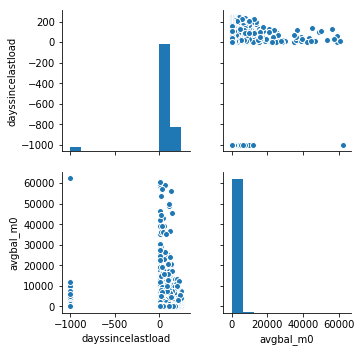

In [85]:
%pylab inline
sns.pairplot(df[['dayssincelastload','avgbal_m0']].dropna())

In [47]:
df.drop(['avgdays_btw_loads_l6','r_avg_max_rtlX_m1','r_avg_max_rtlX_m0','r_avg_max_rtlX_m2','r_avg_max_rechX_m1',
              'r_avg_max_rechX_m2','fail_RtlTxncnt_m0'], \
          axis=1, inplace=True)

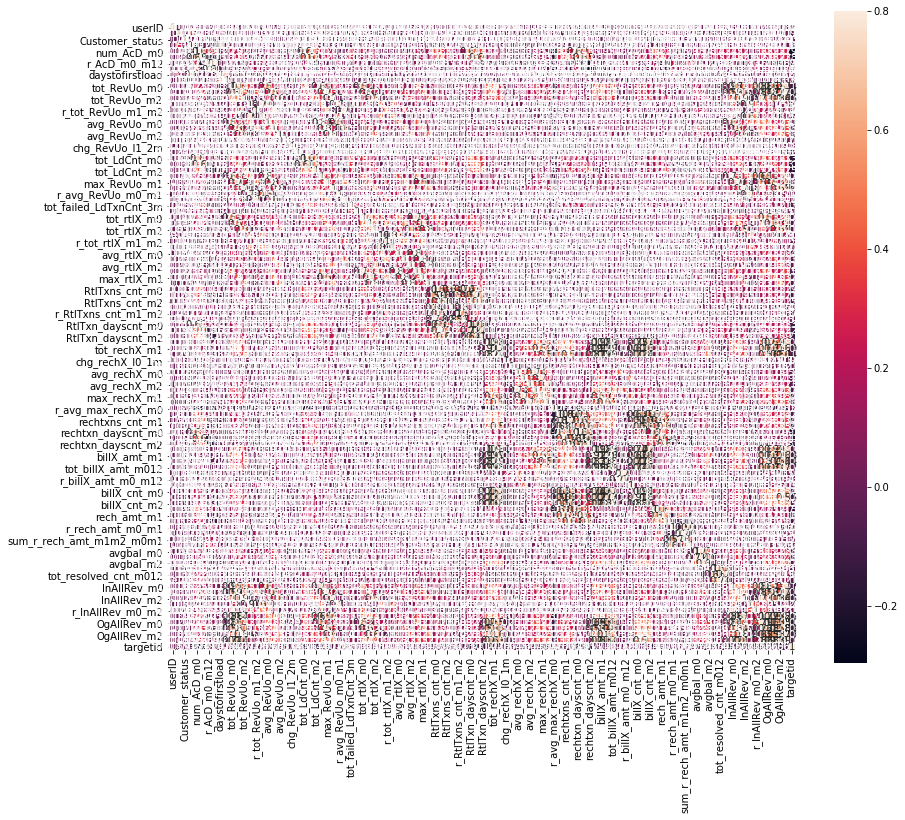

In [49]:
heat_map = df.iloc[:,:]

plt.figure(figsize=(14,12))
sns.heatmap(heat_map.corr(), vmax=0.8, square=True, annot=True)
plt.show()

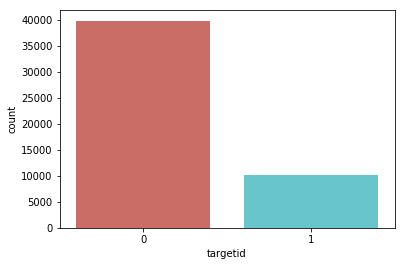

<Figure size 432x288 with 0 Axes>

In [50]:
sns.countplot(x='targetid', data= df, palette ='hls')
plt.show()
plt.savefig('countplot')

In [51]:
df['targetid'].value_counts()

0    39825
1    10175
Name: targetid, dtype: int64

In [52]:
df

,userID,Contact_ind,Customer_status,ActiveSinceDays,num_AcD_m0,num_AcD_m1,r_AcD_m0_m12,r_AcD_m0_m123,daystofirstload,dayssincelastload,...,InAllRev_m1,InAllRev_m2,r_InAllRev_m0_m1,r_InAllRev_m0_m2,tot_InAllRev_3m,OgAllRev_m0,OgAllRev_m1,OgAllRev_m2,tot_OgAllRev_3m,targetid
0,1,1,4,221,1,2,50.000000,33.333333,0,153,...,0.00,497.00,0.000000,0.000000,497.00,199.00,150.00,485.00,834.00,0
1,2,1,4,1225,3,1,150.000000,90.000000,0,14,...,245.00,345.00,270.325203,192.196532,1255.00,839.00,245.00,345.00,1429.00,0
2,3,1,3,838,18,19,120.000000,174.193548,724,47,...,15000.00,13782.57,23.331778,25.392551,32282.57,16730.64,15559.52,11196.57,43486.73,0
3,4,1,4,486,2,0,200.000000,200.000000,0,3,...,0.00,0.00,26400.000000,26400.000000,264.00,302.00,0.00,0.00,302.00,0
4,5,1,3,928,1,1,33.333333,37.500000,0,147,...,0.00,10.00,0.000000,0.000000,10.00,400.00,0.00,577.00,977.00,0
5,6,0,4,433,2,0,133.333333,100.000000,0,162,...,0.00,0.00,0.000000,0.000000,0.00,50.00,0.00,50.00,100.00,1
6,7,1,4,512,1,2,40.000000,42.857143,50,95,...,0.00,300.00,30000.000000,99.667774,600.00,299.00,0.00,398.00,697.00,1
7,8,1,3,502,1,2,40.000000,37.500000,274,52,...,0.00,0.00,100000.000000,100000.000000,1000.00,1000.00,140.00,300.00,1440.00,0
8,9,1,3,322,7,7,82.352941,110.526316,0,4,...,31165.63,23032.00,1.501061,2.031129,54665.46,1315.62,31750.20,23145.16,56210.98,0
9,10,1,3,1170,1,1,40.000000,60.000000,0,72,...,0.00,523.14,23000.000000,43.881406,753.14,229.00,0.00,523.72,752.72,1


In [53]:
y = df['targetid']

In [54]:
type(y)

pandas.core.series.Series

In [55]:
df.isnull().any().any()
df.isnull().sum().sum()
#data['full_count'] = data.apply(lambda x: x.count(), axis=1)

6878

In [56]:
df = df.iloc[:,0:104].replace(0,np.NaN)

In [57]:
df

,userID,Contact_ind,Customer_status,ActiveSinceDays,num_AcD_m0,num_AcD_m1,r_AcD_m0_m12,r_AcD_m0_m123,daystofirstload,dayssincelastload,...,InAllRev_m0,InAllRev_m1,InAllRev_m2,r_InAllRev_m0_m1,r_InAllRev_m0_m2,tot_InAllRev_3m,OgAllRev_m0,OgAllRev_m1,OgAllRev_m2,tot_OgAllRev_3m
0,1,1.0,4.0,221,1,2.0,50.000000,33.333333,NaN,153,...,NaN,NaN,497.00,NaN,NaN,497.00,199.00,150.00,485.00,834.00
1,2,1.0,4.0,1225,3,1.0,150.000000,90.000000,NaN,14,...,665.00,245.00,345.00,270.325203,192.196532,1255.00,839.00,245.00,345.00,1429.00
2,3,1.0,3.0,838,18,19.0,120.000000,174.193548,724.0,47,...,3500.00,15000.00,13782.57,23.331778,25.392551,32282.57,16730.64,15559.52,11196.57,43486.73
3,4,1.0,4.0,486,2,NaN,200.000000,200.000000,NaN,3,...,264.00,NaN,NaN,26400.000000,26400.000000,264.00,302.00,NaN,NaN,302.00
4,5,1.0,3.0,928,1,1.0,33.333333,37.500000,NaN,147,...,NaN,NaN,10.00,NaN,NaN,10.00,400.00,NaN,577.00,977.00
5,6,NaN,4.0,433,2,NaN,133.333333,100.000000,NaN,162,...,NaN,NaN,NaN,NaN,NaN,NaN,50.00,NaN,50.00,100.00
6,7,1.0,4.0,512,1,2.0,40.000000,42.857143,50.0,95,...,300.00,NaN,300.00,30000.000000,99.667774,600.00,299.00,NaN,398.00,697.00
7,8,1.0,3.0,502,1,2.0,40.000000,37.500000,274.0,52,...,1000.00,NaN,NaN,100000.000000,100000.000000,1000.00,1000.00,140.00,300.00,1440.00
8,9,1.0,3.0,322,7,7.0,82.352941,110.526316,NaN,4,...,467.83,31165.63,23032.00,1.501061,2.031129,54665.46,1315.62,31750.20,23145.16,56210.98
9,10,1.0,3.0,1170,1,1.0,40.000000,60.000000,NaN,72,...,230.00,NaN,523.14,23000.000000,43.881406,753.14,229.00,NaN,523.72,752.72


It is a flexible class that allows you to specify the value to replace (it can be something other than NaN) 
and the technique used to replace it (such as mean, median, or mode). 
The Imputer class operates directly on the NumPy array instead of the DataFrame.
The example below uses the Imputer class to replace missing values 
with the mean of each column then prints the number of NaN values in the transformed matrix.


In [58]:

values = df.iloc[:,:].values
imputer = Imputer()
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum())

0


In [59]:
transformed_values

array([[1.00000000e+00, 1.00000000e+00, 4.00000000e+00, ...,
        1.50000000e+02, 4.85000000e+02, 8.34000000e+02],
       [2.00000000e+00, 1.00000000e+00, 4.00000000e+00, ...,
        2.45000000e+02, 3.45000000e+02, 1.42900000e+03],
       [3.00000000e+00, 1.00000000e+00, 3.00000000e+00, ...,
        1.55595200e+04, 1.11965700e+04, 4.34867300e+04],
       ...,
       [4.99980000e+04, 1.00000000e+00, 4.00000000e+00, ...,
        3.72686661e+03, 1.17000000e+03, 3.63250000e+03],
       [4.99990000e+04, 1.00000000e+00, 3.00000000e+00, ...,
        1.15700000e+03, 3.50255124e+03, 1.28800000e+03],
       [5.00000000e+04, 1.00000000e+00, 3.00000000e+00, ...,
        1.05600000e+04, 2.48000000e+03, 1.31100000e+04]])

In [60]:
columns = ('userID', 'Contact_ind', 'Customer_status', 'ActiveSinceDays', 'num_AcD_m0', 'num_AcD_m1', 'r_AcD_m0_m12', 'r_AcD_m0_m123', 'daystofirstload', 'dayssincelastload', 'tot_RevUo_m0', 'tot_RevUo_m1', 'tot_RevUo_m2', 'r_tot_RevUo_m0_m1', 'r_tot_RevUo_m1_m2', 'r_tot_RevUo_m0_m12', 'avg_RevUo_m0', 'avg_RevUo_m1', 'avg_RevUo_m2', 'chg_RevUo_l0_1m', 'chg_RevUo_l1_2m', 'chg_RevUo_l2_3m', 'tot_LdCnt_m0', 'tot_LdCnt_m1', 'tot_LdCnt_m2', 'max_RevUo_m0', 'max_RevUo_m1', 'max_RevUo_m2', 'r_avg_RevUo_m0_m1', 'r_avg_RevUo_m1_m2', 'tot_failed_LdTxnCnt_3m', 'r_failed_LdTxnCnt_m0_m12', 'tot_rtlX_m0', 'tot_rtlX_m1', 'tot_rtlX_m2', 'r_tot_rtlX_m0_m1', 'r_tot_rtlX_m1_m2', 'r_tot_rtlX_m0_m12', 'avg_rtlX_m0', 'avg_rtlX_m1', 'avg_rtlX_m2', 'max_rtlX_m0', 'max_rtlX_m1', 'max_rtlX_m2', 'RtlTxns_cnt_m0', 'RtlTxns_cnt_m1', 'RtlTxns_cnt_m2', 'r_RtlTxns_cnt_m0_m1', 'r_RtlTxns_cnt_m1_m2', 'sum_r_RtlTxns_cnt', 'RtlTxn_dayscnt_m0', 'RtlTxn_dayscnt_m1', 'RtlTxn_dayscnt_m2', 'tot_rechX_m0', 'tot_rechX_m1', 'tot_rechX_m2', 'chg_rechX_l0_1m', 'chg_rechX_l1_2m', 'avg_rechX_m0', 'avg_rechX_m1', 'avg_rechX_m2', 'max_rechX_m0', 'max_rechX_m1', 'max_rechX_m2', 'r_avg_max_rechX_m0', 'rechtxns_cnt_m0', 'rechtxns_cnt_m1', 'rechtxns_cnt_m2', 'rechtxn_dayscnt_m0', 'rechtxn_dayscnt_m1', 'rechtxn_dayscnt_m2', 'billX_amt_m0', 'billX_amt_m1', 'billX_amt_m2', 'tot_billX_amt_m012', 'r_billX_amt_m0_m1', 'r_billX_amt_m0_m12', 'r_billX_amt_m1_m2', 'billX_cnt_m0', 'billX_cnt_m1', 'billX_cnt_m2', 'rech_amt_m0', 'rech_amt_m1', 'rech_amt_m2', 'r_rech_amt_m0_m1', 'r_rech_amt_m1_m2', 'sum_r_rech_amt_m1m2_m0m1', 'r_rech_amt_m0_m12', 'avgbal_m0', 'avgbal_m1', 'avgbal_m2', 'resolved_cnt_m2', 'tot_resolved_cnt_m012', 'percent_resolved_3m', 'InAllRev_m0', 'InAllRev_m1', 'InAllRev_m2', 'r_InAllRev_m0_m1', 'r_InAllRev_m0_m2', 'tot_InAllRev_3m', 'OgAllRev_m0', 'OgAllRev_m1', 'OgAllRev_m2', 'tot_OgAllRev_3m')

In [86]:
type(transformed_values)

numpy.ndarray

In [62]:
#We have to convert the dataset into dataframe
X = pd.DataFrame(transformed_values,columns=columns)

In [64]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
 
# Create the classifier: logreg
logreg = LogisticRegression()
 
# Fit the classifier to the training data
logreg.fit(X_train,y_train)
 
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)
 
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

[[15744   159]
 [ 3973   124]]
             precision    recall  f1-score   support

          0       0.80      0.99      0.88     15903
          1       0.44      0.03      0.06      4097

avg / total       0.72      0.79      0.71     20000

Accuracy of logistic regression classifier on test set: 0.79


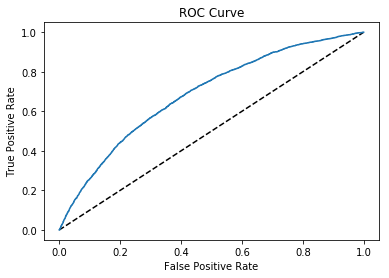

In [87]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [88]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
                    
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.6860439658043437
AUC scores computed using 5-fold cross-validation: [0.70908696 0.70865022 0.70774263 0.7354744  0.72287863]


In [89]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [68]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.84615


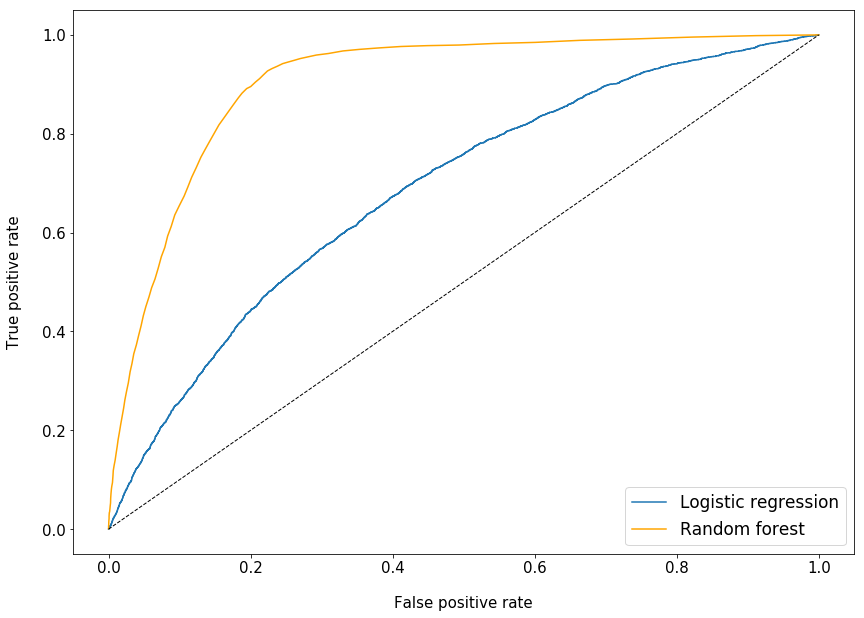

AUC
0.6860439658043437
0.9046803240618915


In [69]:

#Computing the values of the roc curve
preds = logreg.predict_proba(X_test)[:,1]
fpr_0, tpr_0, _ = metrics.roc_curve(y_test, preds)
preds = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

#plotting the graph
plt.figure(figsize = (14,10))
logistic_regression_roc = plt.plot(fpr_0,tpr_0, label='Logistic regression')
random_forest_roc = plt.plot(fpr,tpr,label='Random forest', c='orange')
plt.plot([0,1],[0,1],c='black', ls='--',linewidth =1)
plt.legend(loc=4,fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False positive rate', fontsize=15,labelpad=20)
plt.ylabel('True positive rate', fontsize=15, labelpad=20)
plt.show()

#Computing the value of AUC
auc_logistic = np.trapz(tpr_0,fpr_0)
auc_random = np.trapz(tpr,fpr)

print('AUC')
print(auc_logistic)
print(auc_random)